# **Problem Statement**
The surgence of AI is taking a toll on workers currently in the IT field. The essence of staying relevant and being productive has become a necessity.

This company is facing mental health issues among its employees and is launching a program to address these issues. The survey has been conducted amongst the company’s staff and the results are complex and are not straightforward. The goal is to group responders based on their answers and to provide visual aids to assist cluster interpretation.

## **Objectives and Goals**
1. Build an unsupervised machine learning model to categorize the survey’s participants based on their responses.

2. Create visualizations to gain insights into each cluster of participants and their key traits.

In [ ]:
# !pip install prince
!pip install yellowbrick
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from umap import UMAP

from prince import MCA

from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## **Step 1: Data Preprocessing and Exploration**

In [ ]:
df = pd.read_csv('/content/sample_data/mental-heath-in-tech-2016_20161114.csv')

data = pd.DataFrame(df)
data.head()


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [ ]:
# checking the number of columns
len(data.columns)

63

In [ ]:
# checking for empty values
data.isna().sum()

,0
Are you self-employed?,0
How many employees does your company or organization have?,287
Is your employer primarily a tech company/organization?,287
Is your primary role within your company related to tech/IT?,1170
Does your employer provide mental health benefits as part of healthcare coverage?,287
...,...
What US state or territory do you live in?,593
What country do you work in?,0
What US state or territory do you work in?,582
Which of the following best describes your work position?,0


Clearly there are so many empty values in most columns

In [ ]:
# descriptive analysis
data.describe(include='object')

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,711,1433,1433,1430,1433,840,1433,851,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,116,5,5,70,53,47,53,48,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",Not applicable to me,Often,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,187,557,538,610,840,130,851,141,263,757


**Renaming Columns**

In [ ]:
dict_new_columns = {
    'Are you self-employed?': 'Self Employed',
    'How many employees does your company or organization have?': 'Number of employees',
    'Is your employer primarily a tech company/organization?': 'Tech Company',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'MH Coverage',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'MH Coverage Awareness',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'MH Discussion',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'MH Resources Provided',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'MH Anonimity',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'Medical Leave',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'MH Discuission Neg Impact',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'MH Discuission Coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'MH Discuission Supervisor(s)',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'MH as PH',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'MH Coworker Reveal Neg Impact',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'MH Bad Impact on Career',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'MH Neg View of Coworkers',
    'How willing would you be to share with friends and family that you have a mental illness?': 'MH Sharing Freinds/Family',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'MH Bad Response',
    'Do you have a family history of mental illness?': 'MH Family History',
    'Have you had a mental health disorder in the past?': 'MH Disorder Past',
    'Do you currently have a mental health disorder?': 'Current MH Disorder',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'MH Diagnos Proffesional',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'MH Sought Proffes Treat',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'What country do you live in?': 'Country',
    'What US state or territory do you live in?': 'US State',
    'What country do you work in?': 'Work Country',
    'What US state or territory do you work in?': 'Work US State',
    'Which of the following best describes your work position?': 'Work Position',
    'Do you work remotely?': 'Remote',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'PH Discuission Neg Impact',
    'Do you have previous employers?': 'Prev Employers',
    'Have your previous employers provided mental health benefits?': 'Prev MH Benefits',
    'Were you aware of the options for mental health care provided by your previous employers?': 'MH Awarness Prev',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'Prev MH Discussion',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'Prev MH Resources Provided',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'Prev MH Anonimity',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'Prev MH Discuission Neg Impact',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'Prev PH Discuission Neg Impact',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'Prev MH Discuission Coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'Prev MH Discuission Supervisor(s)',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'Prev MH as PH',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'Prev MH Coworker Reveal Neg Impact',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH in Interview',
    'Why or why not?': 'Why/why not',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'MH in Interview',
    'Why or why not?.1': 'Why/why not (1)',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'Less Reveal MH after observation',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'MH Effective Treatment',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'MH NOT Effective Treatment'
}

data.rename(columns=dict_new_columns, inplace=True)

In [ ]:
data.head()

,Self Employed,Number of employees,Tech Company,Is your primary role within your company related to tech/IT?,MH Coverage,MH Coverage Awareness,MH Discussion,MH Resources Provided,MH Anonimity,Medical Leave,...,MH Effective Treatment,MH NOT Effective Treatment,Age,Gender,Country,US State,Work Country,Work US State,Work Position,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [ ]:
# Removing columns with a significant amount of null values
cols_to_drop = list(data.isna().sum() >= 500)
data.drop(data.columns[cols_to_drop], axis=1, inplace=True)
len(data.columns)

48

In [ ]:
data.isna().sum()

,0
Self Employed,0
Number of employees,287
Tech Company,287
MH Coverage,287
MH Coverage Awareness,420
MH Discussion,287
MH Resources Provided,287
MH Anonimity,287
Medical Leave,287
MH Discuission Neg Impact,287


## **Dealing with Missing Values**

In [ ]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imputer.fit(data)

imputed_data = mode_imputer.transform(data)
imputed_df = pd.DataFrame(data=imputed_data, columns=data.columns)

**For Gender**

In [ ]:

# Male
male = ['Male', 'male', 'Male ', 'M', 'm', 'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', 'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'cisdude', 'cis man', 'MALE',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "]
imputed_df['Gender'].replace(to_replace=male, value='Male', inplace=True)

# Female
female = ['Female', 'female', 'female ',  'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F', ' Female', 'Cis-woman', 'AFAB',
          'Genderfluid (born female)',  'Female ', 'woman', 'female/woman', 'Cisgender Female', 'fem', 'female-bodied; no feelings about gender',
          'Female (props for making this a freeform field, though)', 'I identify as female.', 'Female assigned at birth ', 'Female or Multi-Gender Femme']
imputed_df['Gender'].replace(to_replace=female, value='Female', inplace=True)

# Non-binary
other = ['non-binary', 'Agender', 'Nonbinary', 'Queer', 'nb masculine', 'mtf', 'human', 'genderqueer woman', 'genderqueer', 'Unicorn',
         'Transgender woman', 'Bigender', 'Enby', 'Other', 'Other/Transfeminine', 'Human', 'Genderqueer', 'Genderflux demi-girl', 'Genderfluid',
         'Fluid', 'Enby Bigender', 'Androgynous', 'none of your business', 'Male (trans, FtM)']

imputed_df['Gender'].replace(to_replace=other, value='Other', inplace=True)

imputed_df[['Gender']].value_counts()

,count
Gender,
Male,1062
Female,343
Other,28


**For Age**

In [ ]:
# weird ages: 3, 15, 99, 323
replace = imputed_df[(data['Age'] < 18) | (imputed_df['Age'] > 75)]['Age'].tolist()
value = round(imputed_df[(imputed_df['Age'] >= 18) | (imputed_df['Age'] <= 75)]['Age'].mean())

imputed_df['Age'].replace(to_replace=replace, value=value, inplace=True)

In [ ]:
age_group = imputed_df['Age'].unique()

categories = {
    "Before 20": list(range(17, 20)),
    "20+": list(range(20, 30)),
    "30+": list(range(30, 40)),
    "40+": list(range(40, 50)),
    "Above 50+": list(range(50, 75))
}

for age in list(age_group):
    for key, values in categories.items():
        for value in values:
            if value == age:
                imputed_df['Age'].replace(age, value=key, inplace=True)

imputed_df['Age'].value_counts()

,count
Age,
30+,683
20+,443
40+,235
Above 50+,68
Before 20,4


**For Country**

In [ ]:
# group the countries which have less than 20 employees
countries = ['Sweden', 'France', 'Ireland', 'Switzerland', 'Brazil', 'India',
             'New Zealand', 'Russia', 'Denmark', 'Bulgaria','Finland','Italy', 'Belgium',
             'Spain', 'Austria', 'South Africa', 'Poland ', 'Romania', 'Pakistan',
             'Norway', 'Czech Republic', 'Chile', 'Lithuania', 'Other', 'Mexico',
             'Afghanistan', 'Japan', 'Colombia', 'Bosnia and Herzegovina', 'Estonia',
             'Israel', 'Venezuela', 'Argentina', 'Bangladesh', 'Taiwan', 'Brunei',
             'China', 'Serbia', 'Slovakia', 'Costa Rica', 'Ecuador', 'Greece', 'Guatemala',
             'Hungary', 'Algeria', 'Iran', 'Vietnam', 'Poland']

imputed_df['Country'].replace(to_replace=countries, value='Other', inplace=True)
imputed_df['Country'].replace(to_replace='United States of America', value='USA', inplace=True)
imputed_df['Country'].replace(to_replace='United Kingdom', value='UK', inplace=True)

imputed_df[['Country']].value_counts()


,count
Country,
USA,840
Other,194
UK,180
Canada,78
Germany,58
Netherlands,48
Australia,35


In [ ]:
countries.extend(["United Arab Emirates", "Turkey"])

In [ ]:
imputed_df['Work Country'].replace(to_replace='United States of America', value='USA', inplace=True)
imputed_df['Work Country'].replace(to_replace='United Kingdom', value='UK', inplace=True)
imputed_df['Work Country'].replace(to_replace=countries, value='Other', inplace=True)
imputed_df[['Work Country']].value_counts()

,count
Work Country,
USA,851
Other,186
UK,183
Canada,74
Germany,58
Netherlands,47
Australia,34


**For Why / Why not**

In [ ]:
negative_impact_conditions = ["depend", "support", "same", "bad", "deter", "relate", "qualif",
                              "underst", "hurt", 'chance', "crazy", "doubt",  "weak", "product", "liability",
                              "nothing", "allude", "reject", "respect", "eliminat", "pass", "leave", "filter", "expect",
                              "complain"]

discrimination_conditions = ["stigma", "discrimination", "cost", "serious", "IQ", "believe", "disqualify", "discount", "prejudice",
                             "taboo", "judge", "fear", "disability", "unstable", "unreliable"]

privacy_conditions = ["personal", "priva", "accommodation", "situation", "trust", "problem", "shar", "sensitive", "never",
                      "feel", "business", "reflect", "embarass", "obligat", "concern", "condition"]

uncertainty_conditions = ["reaction", "recept", "sure", "issue", "offer", "know", "neg", "afraid", "refus",
                          "necessary", "vulnerable", "stupid", "crap"]

job_performance_conditions = ["map", "bias", "impact", "compromise", "uncomfortable", "relate", "job", "against",
                              "sign", "discuss", "ffect", "no"]

legal_conditions = ["manageable", "suicide", "dismis", "depression", "anxiety", "ocd", "burn", "consider"]

transparency_conditions = ["support", "relevant", "reaction", "prompt", "doubt", "perceive", "risk", "accept", "honest",
                          "perception", "option", "important", "open", "protect"]

lack_of_benefit_conditions = ["appl", "above", "part", "topical", "stance", "aware","roadblock", "won't", "harm",
                              "position", "benef", "previous", "physical", "potential", "as", "see", "disclos"]

categories = {
    "Negative Impact on Hiring Chances": negative_impact_conditions,
    "Fear of Discrimination or Prejudice": discrimination_conditions,
    "Privacy and Personal Concerns": privacy_conditions,
    "Uncertainty about Employer Reaction": uncertainty_conditions,
    "Concerns about Job Performance or Suitability": job_performance_conditions,
    "Legal and Rights Considerations": legal_conditions,
    "Desire for Transparency and Alignment": transparency_conditions,
    "Lack of Benefit in Disclosing": lack_of_benefit_conditions
}

In [ ]:
responses = imputed_df['Why/why not (1)'].unique()

for response in responses:
    for word in response.lower().split():
        for key, values in categories.items():
            if any(value in word for value in values):
                imputed_df['Why/why not (1)'].replace(response, value=key, inplace=True)
                break

for response in responses:
    for key, values in categories.items():
        if key != response:
            imputed_df['Why/why not (1)'].replace(response, value="Other", inplace=True)

imputed_df['Why/why not (1)'].unique()

array(['Fear of Discrimination or Prejudice',
       'Lack of Benefit in Disclosing',
       'Concerns about Job Performance or Suitability',
       'Uncertainty about Employer Reaction',
       'Negative Impact on Hiring Chances',
       'Privacy and Personal Concerns',
       'Desire for Transparency and Alignment', 'Other',
       'Legal and Rights Considerations'], dtype=object)

In [ ]:
responses_2 = imputed_df['Why/why not'].unique()

for response in responses_2:
    for word in response.lower().split():
        for key, values in categories.items():
            if any(value in word for value in values):
                imputed_df['Why/why not'].replace(response, value=key, inplace=True)
                break

for response in responses_2:
    for key, values in categories.items():
        if key != response:
            imputed_df['Why/why not'].replace(response, value="Other", inplace=True)

imputed_df['Why/why not'].unique()

array(['Fear of Discrimination or Prejudice',
       'Negative Impact on Hiring Chances',
       'Uncertainty about Employer Reaction',
       'Lack of Benefit in Disclosing', 'Privacy and Personal Concerns',
       'Other', 'Desire for Transparency and Alignment',
       'Concerns about Job Performance or Suitability',
       'Legal and Rights Considerations'], dtype=object)

**Work Position**

In [ ]:
job_roles = imputed_df['Work Position'].unique()

categories_2 = {
    "IT Development": ["Back", "Developer", "Front"],
    "Management": ["Supervisor","Team", "Lead", "Leadership"],
    "DevOps": ["DevOps", "SysAdmin"],
    "Advocacy": ["Evangelist", "Advocate"],
    "Support": ["Support"],
    "Design": ["Design"],
    "Sales": ["Sales"],
    "Other": ["Other"],
    "One-person shop":["One","person", "shop"],
    "HR": ['HR']
}

for role in job_roles:
    for word in role.lower().split():
        for key, values in categories_2.items():
            if any(value.lower() in word for value in values):
                imputed_df['Work Position'].replace(role, value=key, inplace=True)
                break

imputed_df['Work Position'].value_counts()


,count
Work Position,
IT Development,746
Management,268
Other,130
One-person shop,104
DevOps,75
Support,41
Advocacy,30
Design,29
HR,6


## **Encoding**

In [ ]:
labeled_df = imputed_df.copy()

le = LabelEncoder()

for column in labeled_df.columns:
    if labeled_df[column].dtype == 'object':
        labeled_df[column] = le.fit_transform(labeled_df[column].astype(str))

labeled_df.head()

,Self Employed,Number of employees,Tech Company,MH Coverage,MH Coverage Awareness,MH Discussion,MH Resources Provided,MH Anonimity,Medical Leave,MH Discuission Neg Impact,...,MH Diagnos Proffesional,MH Sought Proffes Treat,MH Effective Treatment,MH NOT Effective Treatment,Age,Gender,Country,Work Country,Work Position,Remote
0,0,2,1,2,1,1,1,0,5,1,...,1,0,1,1,1,1,5,5,4,2
1,0,4,1,1,2,2,2,2,3,1,...,1,1,3,4,0,1,6,6,4,1
2,0,4,1,1,1,1,1,0,1,0,...,0,1,1,1,1,1,5,5,4,0
3,1,2,1,3,1,1,1,0,3,0,...,1,1,4,4,2,1,5,5,5,2
4,0,4,0,3,2,1,1,1,1,2,...,1,1,4,4,2,0,6,6,5,2


## **Removing Highly Correlated Features**

<Axes: >

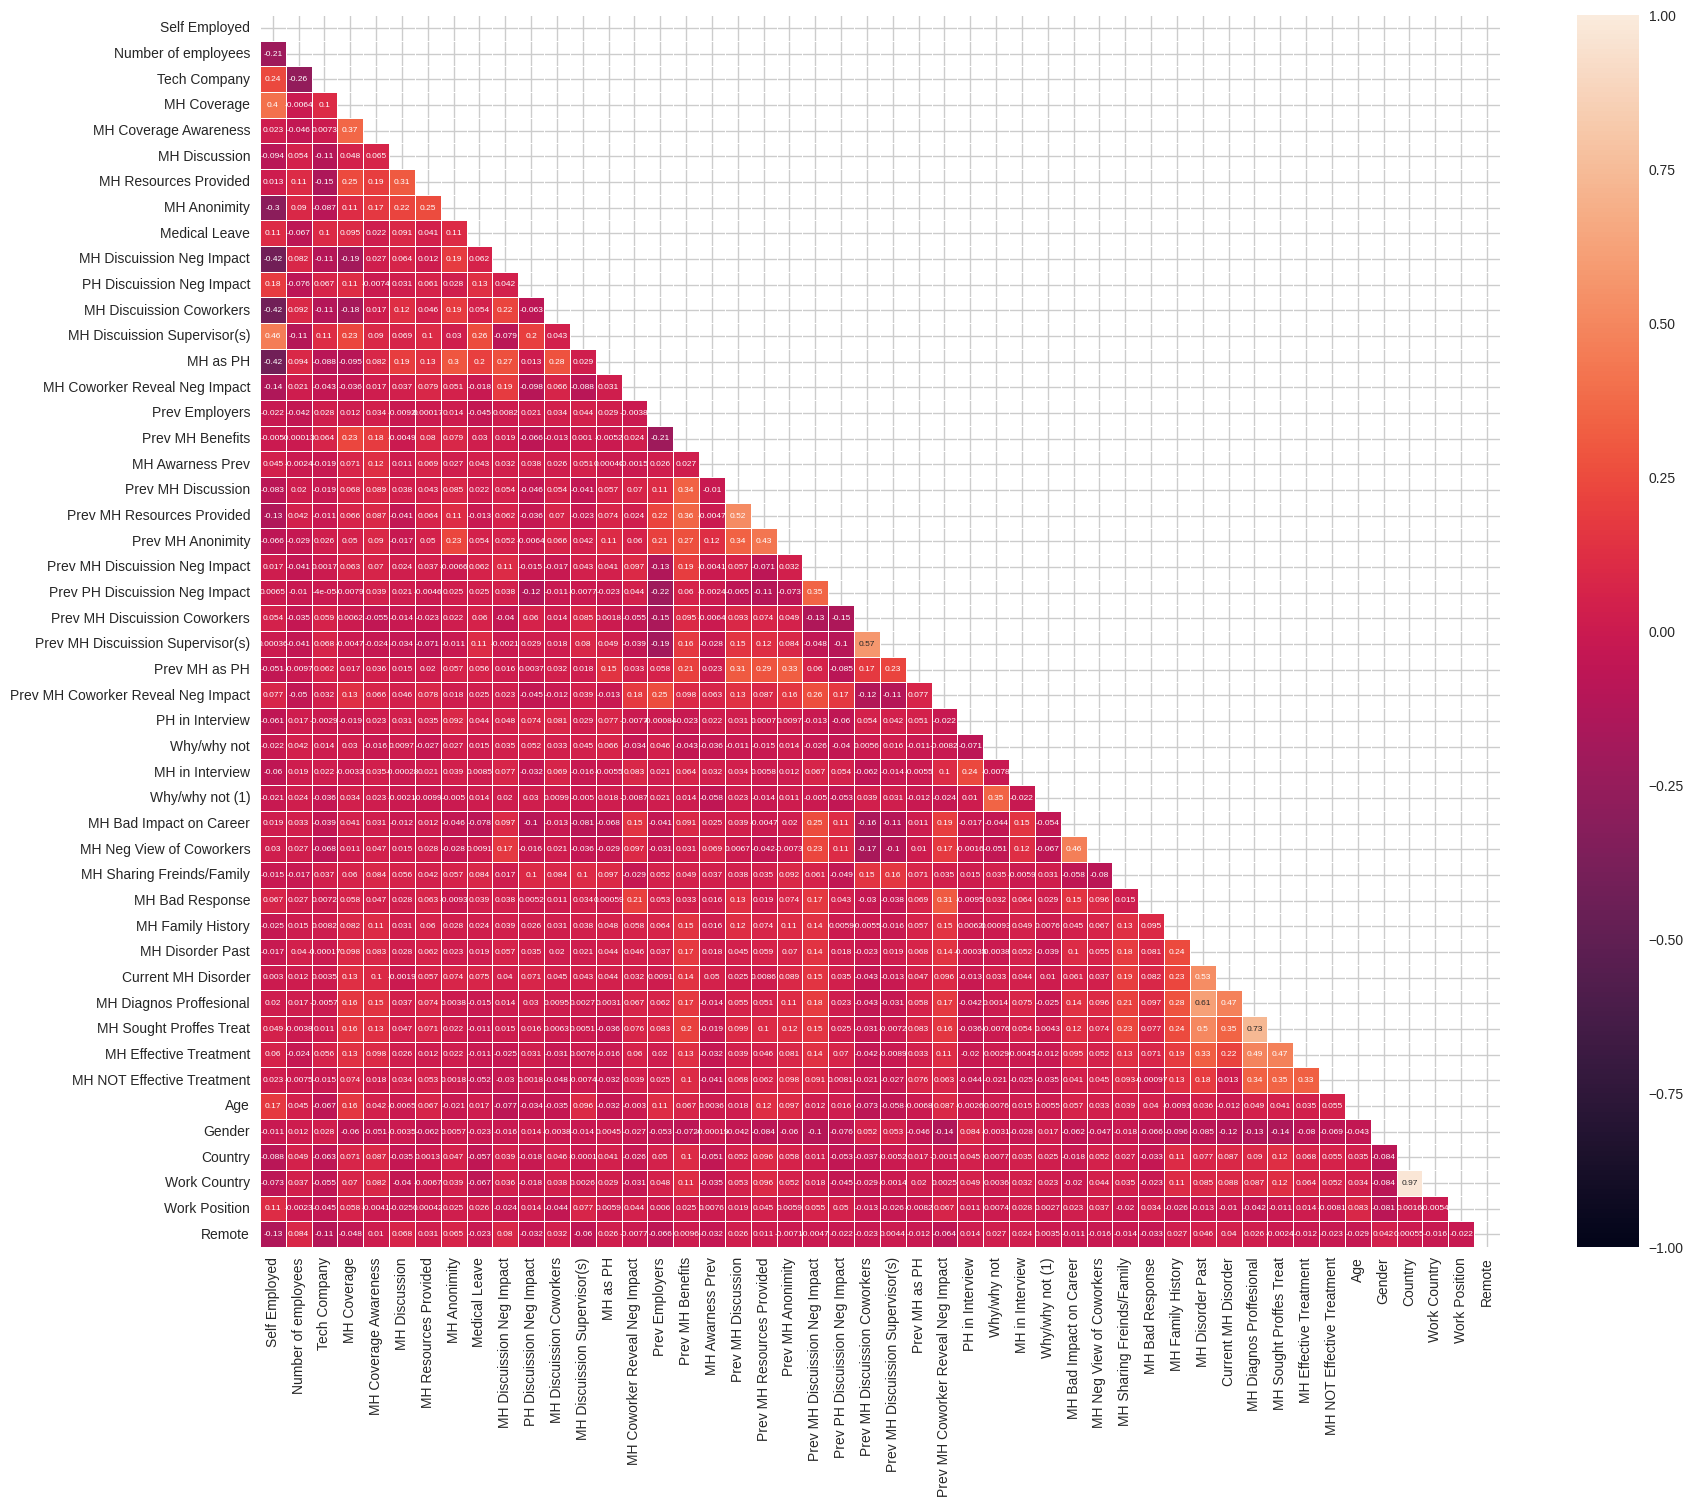

In [ ]:
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(labeled_df.corr(), dtype=bool))

sns.heatmap(labeled_df.corr(), vmin=-1, vmax=1, mask=mask, annot=True, annot_kws={'size': 6}, linewidths=0.7)

In [ ]:
corr_matrix = labeled_df.corr()
threshold = 0.8

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            labeled_df.drop(columns=[corr_matrix.columns[i], corr_matrix.columns[j]], inplace=True)

labeled_df.shape

(1433, 46)

## **Visualizations and Insights**

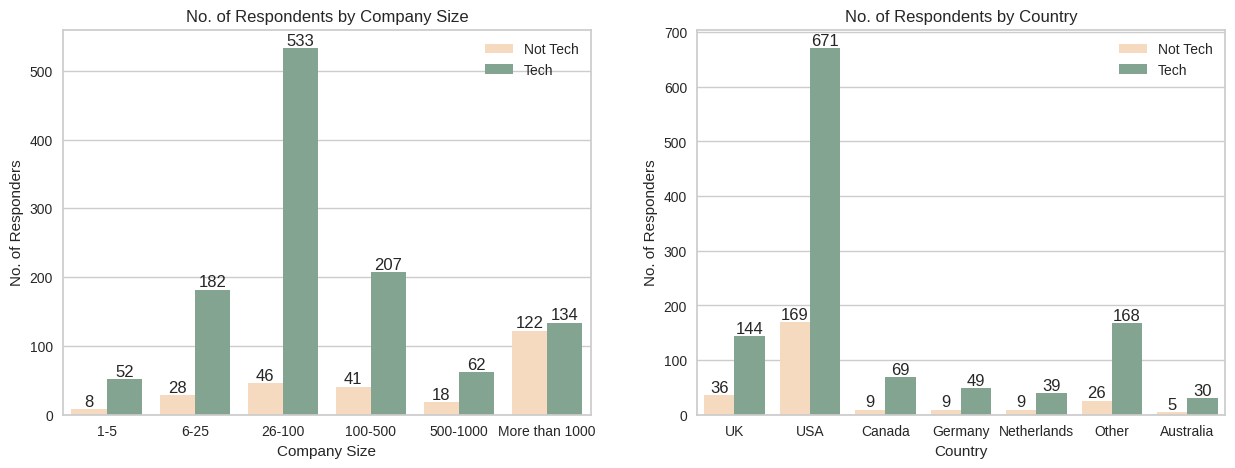

In [31]:
# First Chart
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(x = imputed_df['Number of employees'], hue = imputed_df['Tech Company'],
              order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
              palette=["#FFD9B7", "#7EAA92"])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('No. of Respondents by Company Size')
plt.xlabel('Company Size')
plt.ylabel('No. of Responders')
plt.legend(['Not Tech', 'Tech'])

# Second Chart
plt.subplot(1, 2, 2)
ax = sns.countplot(x = imputed_df['Country'], hue = imputed_df['Tech Company'],
              palette=["#FFD9B7", "#7EAA92"])

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('No. of Respondents by Country')
plt.ylabel('No. of Responders')
plt.legend(['Not Tech', 'Tech'])


According to the survey responses, the most prominent company size is '25-100', with about 533 responses from tech-company and 46 responses from non-tech ones, while the '1-5' company size has the fewest responses with 52 from tech-company and 8 from non-tech ones. It is worth mentioning that non-tech companies tend to have more than 1,000 employees in their organization.

In terms of country distribution, the United States of America has the highest number of responses from both types of companies, followed by the United Kingdom with 144 responses from tech companies and 36 from non-tech ones, while Australia has the lowest number of responses from both types of companies, with 30 and 5, respectively.

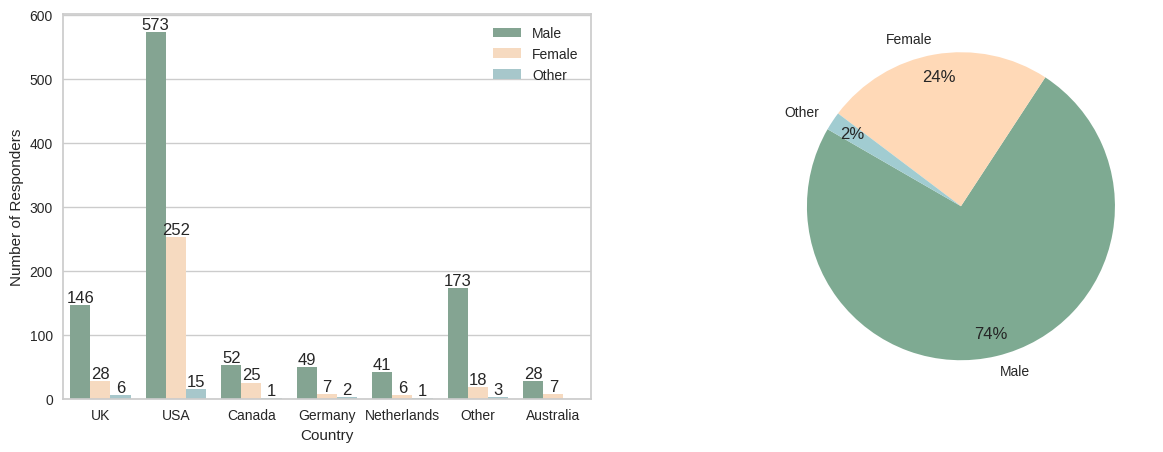

In [32]:
colors = ["#7EAA92", "#FFD9B7" ,"#A1CCD1"]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
imputed_df['MH Sharing Freinds/Family'].replace(to_replace='Not applicable to me (I do not have a mental illness)', value='No mental illness', inplace=True)
ax = sns.countplot(x = imputed_df['Country'], hue = imputed_df['Gender'], palette=colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

plt.ylabel("Number of Responders")
plt.legend(['Male', 'Female', 'Other'])

# Pie chart

gender_labels = ['Male', 'Female', 'Other']
values = imputed_df['Gender'].value_counts()
sizes = [values[0], values[1], values[2]]

plt.subplot(1, 2, 2)
plt.pie(sizes, colors=colors, labels=gender_labels, autopct='%1.f%%', startangle=150, pctdistance=0.85)

# plt.savefig("gender.png")
plt.show()

According to the charts, it is clear that most the majority of participants from all countries are male and approximately one quarter are female.

In [33]:
imputed_df['MH Sharing Freinds/Family'].replace(to_replace='Not applicable to me (I do not have a mental illness)', value='No mental illness', inplace=True)

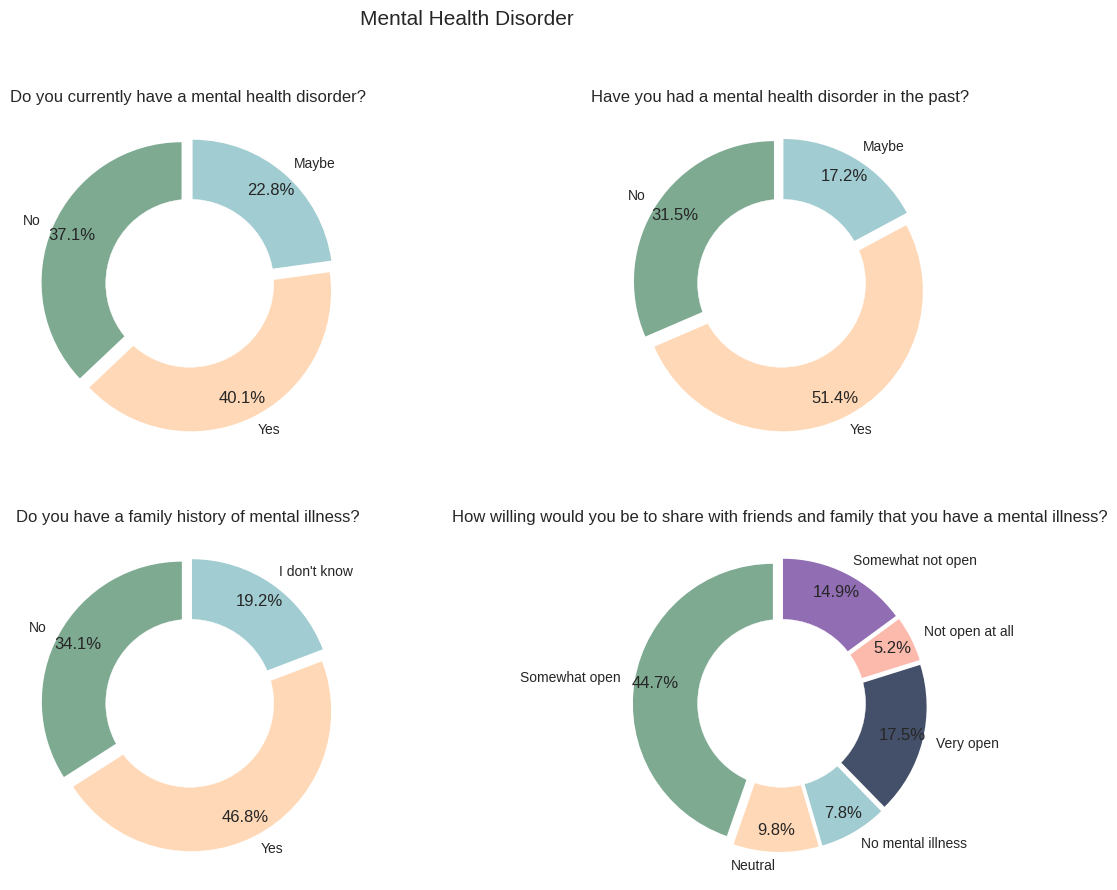

In [34]:
# First Pie: Current MH Disorder
labels = ['No', 'Yes', 'Maybe']

no_mhd = imputed_df[imputed_df['Current MH Disorder'] == "No"].shape[0]
yes_mhd = imputed_df[imputed_df['Current MH Disorder'] == "Yes"].shape[0]
maybe_mhd = imputed_df[imputed_df['Current MH Disorder'] == "Maybe"].shape[0]

sizes = [no_mhd, yes_mhd, maybe_mhd]
colors = ["#7EAA92", "#FFD9B7", "#A1CCD1"]
explode = (0.05,0.05,0.05)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle('Mental Health Disorder', fontsize=15)

axs[0, 0].pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

## draw circle
centre_circle = plt.Circle((0.0125, 0.0125), 0.6, color='white')
axs[0, 0].add_artist(centre_circle)

axs[0, 0].set_title("Do you currently have a mental health disorder?")

# Second Pie: Past MH Disorder
labels_2 = ['No', 'Yes', 'Maybe']

no_mhd_2 = imputed_df[imputed_df['MH Disorder Past'] == "No"].shape[0]
yes_mhd_2 = imputed_df[imputed_df['MH Disorder Past'] == "Yes"].shape[0]
maybe_mhd_2 = imputed_df[imputed_df['MH Disorder Past'] == "Maybe"].shape[0]

sizes_2 = [no_mhd_2, yes_mhd_2, maybe_mhd_2]

axs[0, 1].pie(sizes_2, colors=colors, labels=labels_2, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

#draw circle
centre_circle = plt.Circle((0.0125, 0.0125), 0.6, color='white')
axs[0, 1].add_artist(centre_circle)

axs[0, 1].set_title("Have you had a mental health disorder in the past?")

# Third Pie Chart: MH Family History
labels_3 = ['No', 'Yes', "I don't know"]

no_mhd_3 = imputed_df[imputed_df['MH Family History'] == "No"].shape[0]
yes_mhd_3 = imputed_df[imputed_df['MH Family History'] == "Yes"].shape[0]
maybe_mhd_3 = imputed_df[imputed_df['MH Family History'] == "I don't know"].shape[0]

sizes_3 = [no_mhd_3, yes_mhd_3, maybe_mhd_3]

axs[1, 0].pie(sizes_3, colors=colors, labels=labels_3, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

#draw circle
centre_circle = plt.Circle((0.0125, 0.0125), 0.6, color='white')
axs[1, 0].add_artist(centre_circle)

axs[1, 0].set_title("Do you have a family history of mental illness?")

# Fourth Pie Chart: MH Sharing Freinds/Family
labels_4 = ['Somewhat open', 'Neutral', 'No mental illness',
            'Very open', 'Not open at all', 'Somewhat not open']

som_open = imputed_df[imputed_df['MH Sharing Freinds/Family'] == "Somewhat open"].shape[0]
neutral = imputed_df[imputed_df['MH Sharing Freinds/Family'] == "Neutral"].shape[0]
no_mhd = imputed_df[imputed_df['MH Sharing Freinds/Family'] == "No mental illness"].shape[0]
open_ = imputed_df[imputed_df['MH Sharing Freinds/Family'] == "Very open"].shape[0]
no_open = imputed_df[imputed_df['MH Sharing Freinds/Family'] == "Not open at all"].shape[0]
som_no_open = imputed_df[imputed_df['MH Sharing Freinds/Family'] == "Somewhat not open"].shape[0]

explode_4 = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
colors_4 = ["#7EAA92", "#FFD9B7" ,"#A1CCD1", '#445069', '#FCBAAD', '#916DB3']

sizes_4 = [som_open, neutral, no_mhd, open_, no_open, som_no_open]

axs[1, 1].pie(sizes_4, colors=colors_4, labels=labels_4, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode_4)

#draw circle
centre_circle = plt.Circle((0.0125, 0.0125), 0.6, color='white')
axs[1, 1].add_artist(centre_circle)

axs[1, 1].set_title("How willing would you be to share with friends and family that you have a mental illness?")

# plt.savefig("mhd.png")

plt.show()

About 40% of respondents confirmed that they currently have a mental health disorder, while half of them had a mental health disorder in the past.

Approximately half of the participants have a family history of mental illness and 34.1% do not.

When it comes to sharing their mental illness with family or friends, around 62% of employee staff expressed openness or some degree of openness, while about 20% did not

In [35]:
to_replace = ["No, I don't think it would", "Yes, I think it would", 'No, it has not']
new_values = ["I don't think so", "I think yes", 'No']

for i in range(len(to_replace)):
    imputed_df['MH Bad Impact on Career'].replace(to_replace=to_replace[i], value=new_values[i], inplace=True)

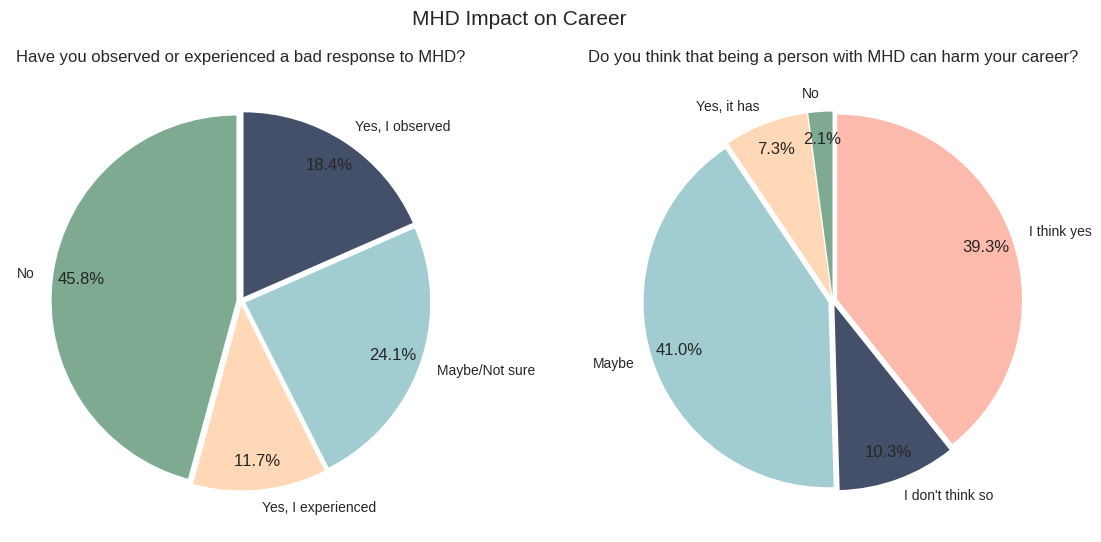

In [37]:
# First Pie: MH Bad Impact on Career
labels = ['No', 'Yes, it has', 'Maybe', "I don't think so", 'I think yes']

no_mhd = imputed_df[imputed_df['MH Bad Impact on Career'] == "No"].shape[0]
yes_mhd = imputed_df[imputed_df['MH Bad Impact on Career'] == "Yes, it has"].shape[0]
maybe_mhd = imputed_df[imputed_df['MH Bad Impact on Career'] == "Maybe"].shape[0]
think_no = imputed_df[imputed_df['MH Bad Impact on Career'] == "I don't think so"].shape[0]
think_yes = imputed_df[imputed_df['MH Bad Impact on Career'] == "I think yes"].shape[0]

sizes = [no_mhd, yes_mhd, maybe_mhd, think_no, think_yes]
colors = ["#7EAA92", "#FFD9B7", "#A1CCD1", '#445069', '#FCBAAD']
explode = (0.025, 0.025, 0.025, 0.025, 0.025)

plt.figure(figsize=(14, 6))
plt.suptitle('MHD Impact on Career', fontsize=15)
plt.subplot(1, 2, 2)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title("Do you think that being a person with MHD can harm your career?")

# Second Pie: MH Bad Response
labels_2 = ['No', 'Yes, I experienced', 'Maybe/Not sure', 'Yes, I observed']

no_mhd_2 = imputed_df[imputed_df['MH Bad Response'] == "No"].shape[0]
yes_mhd_2 = imputed_df[imputed_df['MH Bad Response'] == "Yes, I experienced"].shape[0]
maybe_mhd_2 = imputed_df[imputed_df['MH Bad Response'] == "Maybe/Not sure"].shape[0]
yes_obsv = imputed_df[imputed_df['MH Bad Response'] == "Yes, I observed"].shape[0]
explode_2 = (0.025, 0.025, 0.025, 0.025)

sizes_2 = [no_mhd_2, yes_mhd_2, maybe_mhd_2, yes_obsv]

plt.subplot(1, 2, 1)
plt.pie(sizes_2, colors=colors[:4], labels=labels_2, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode_2)

plt.title("Have you observed or experienced a bad response to MHD?")

# plt.savefig("career.png")

plt.show()

Around 45% of them think that having a mental disorder can harm their career, even though 45.8% never experienced or observed a bad response to it in the workplace.

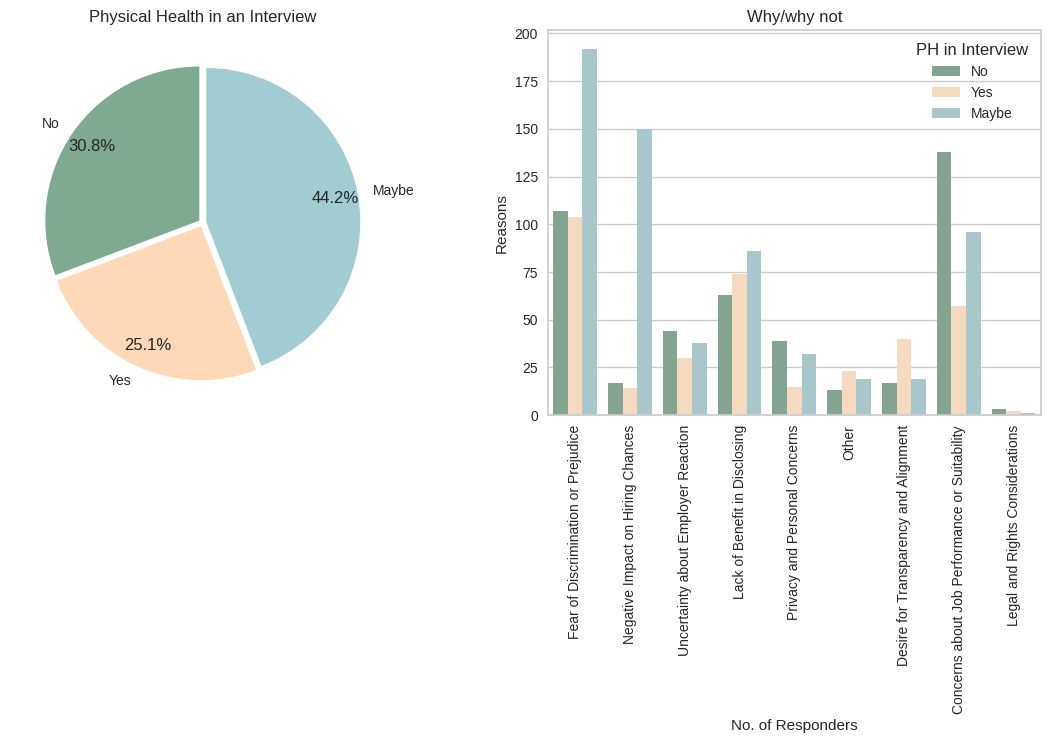

In [38]:
labels = ['No', 'Yes', 'Maybe']
colors = ["#7EAA92", "#FFD9B7", "#A1CCD1"]

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)

sns.countplot(imputed_df, x=imputed_df['Why/why not'], hue='PH in Interview',
              hue_order=labels, palette=colors)
plt.xticks(rotation=90)

plt.ylabel("Reasons")
plt.xlabel("No. of Responders")
plt.title("Why/why not")

# Second Pie: PH in Interview

no_mhd = imputed_df[imputed_df['PH in Interview'] == "No"].shape[0]
yes_mhd = imputed_df[imputed_df['PH in Interview'] == "Yes"].shape[0]
maybe_mhd = imputed_df[imputed_df['PH in Interview'] == "Maybe"].shape[0]

sizes = [no_mhd, yes_mhd, maybe_mhd]
explode = (0.025, 0.025, 0.025)

plt.subplot(1, 2, 1)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title("Physical Health in an Interview")

# plt.savefig("ph_interview.png")

plt.show()

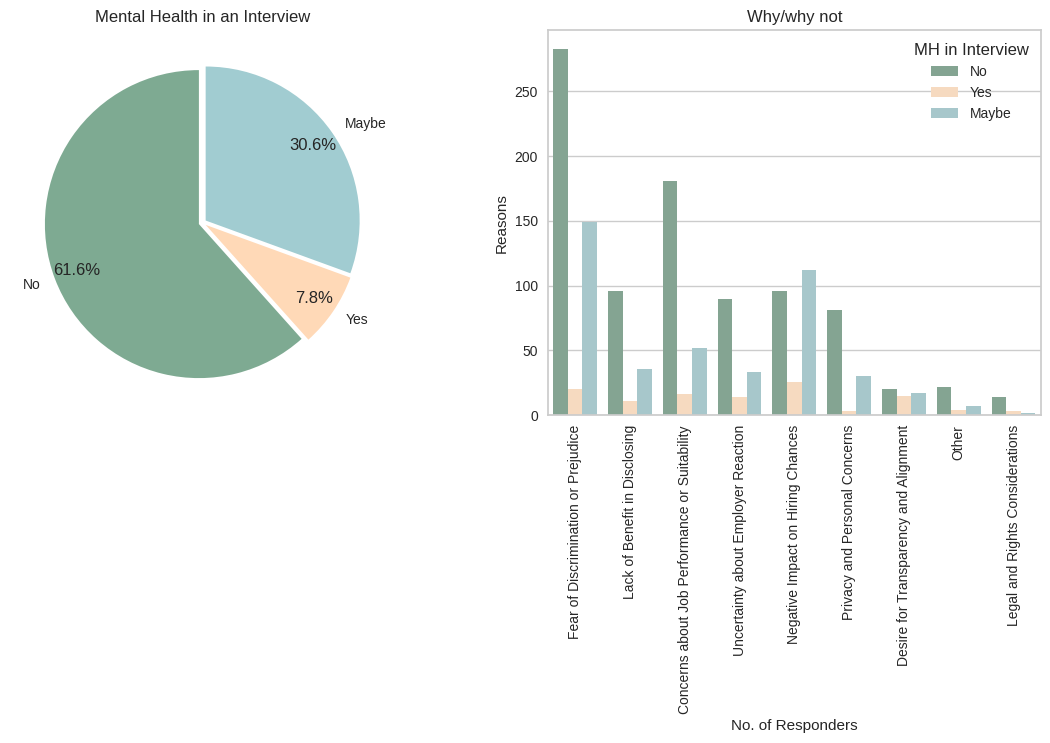

In [39]:
# First Chart

no_mhd_2 = imputed_df[imputed_df['MH in Interview'] == "No"].shape[0]
yes_mhd_2 = imputed_df[imputed_df['MH in Interview'] == "Yes"].shape[0]
maybe_mhd_2 = imputed_df[imputed_df['MH in Interview'] == "Maybe"].shape[0]

sizes_2 = [no_mhd_2, yes_mhd_2, maybe_mhd_2]

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes_2, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

plt.title("Mental Health in an Interview")

# Second Chart
plt.subplot(1, 2, 2)

sns.countplot(imputed_df, x=imputed_df['Why/why not (1)'], hue='MH in Interview',
              hue_order=labels, palette=colors)
plt.xticks(rotation=90)

plt.title('Why/why not')
plt.ylabel('Reasons')
plt.xlabel("No. of Responders")

# plt.savefig("mh_interview.png")

plt.show()

According to the survey, almost one-third of the participants (30.8%) would not discuss their physical health issues with a potential employer due to privacy, fear of the negative impact on their chances of being hired, and uncertainty about the employer's reaction. And 61.8% of participants would hesitate to discuss their mental health issues for the same reasons.

On the other hand, only 7.8% of participants would be open to talking about their mental health issues, while 25.1% would be comfortable discussing their physical health issues.

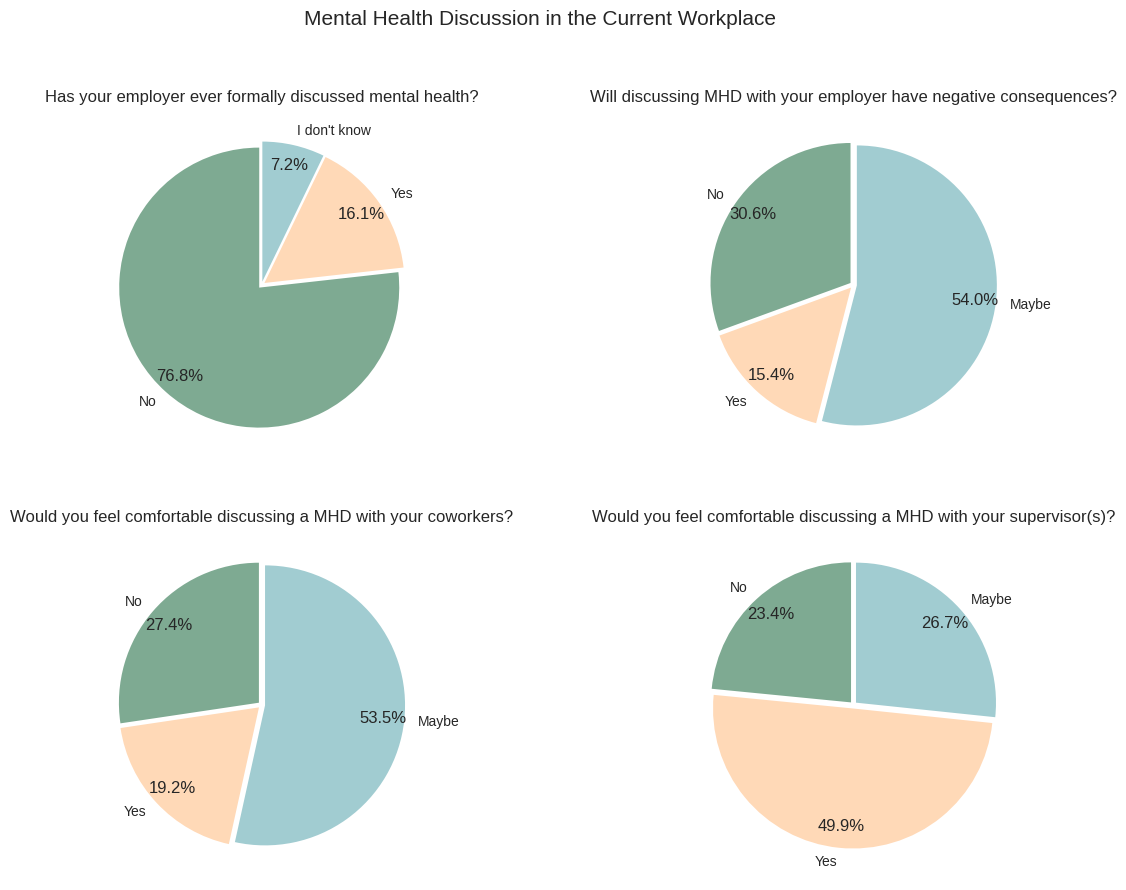

In [40]:
# First Pie: MH Discussion
labels = ['No', 'Yes', "I don't know"]

no_mhd = imputed_df[imputed_df['MH Discussion'] == "No"].shape[0]
yes_mhd = imputed_df[imputed_df['MH Discussion'] == "Yes"].shape[0]
dont_know = imputed_df[imputed_df['MH Discussion'] == "I don't know"].shape[0]

sizes = [no_mhd, yes_mhd, dont_know]
colors = ["#7EAA92", "#FFD9B7", "#A1CCD1"]
explode = (0.025, 0.025, 0.025)

plt.figure(figsize=(14, 10))
plt.suptitle('Mental Health Discussion in the Current Workplace', fontsize=15)
plt.subplot(2, 2, 1)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title("Has your employer ever formally discussed mental health?")

# Second Pie: MH Discuission Neg Impact
labels_2 = ['No', 'Yes', 'Maybe']

no_mhd_2 = imputed_df[imputed_df['MH Discuission Neg Impact'] == "No"].shape[0]
yes_mhd_2 = imputed_df[imputed_df['MH Discuission Neg Impact'] == "Yes"].shape[0]
maybe_mhd_2 = imputed_df[imputed_df['MH Discuission Neg Impact'] == "Maybe"].shape[0]

sizes_2 = [no_mhd_2, yes_mhd_2, maybe_mhd_2]

plt.subplot(2, 2, 2)
plt.pie(sizes_2, colors=colors, labels=labels_2, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

plt.title("Will discussing MHD with your employer have negative consequences?")

# Third Pie: MH Discuission Coworkers

no_mhd_3 = imputed_df[imputed_df['MH Discuission Coworkers'] == "No"].shape[0]
yes_mhd_3 = imputed_df[imputed_df['MH Discuission Coworkers'] == "Yes"].shape[0]
maybe_mhd_3 = imputed_df[imputed_df['MH Discuission Coworkers'] == "Maybe"].shape[0]

sizes_3 = [no_mhd_3, yes_mhd_3, maybe_mhd_3]

plt.subplot(2, 2, 3)
plt.pie(sizes_3, colors=colors, labels=labels_2, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

plt.title("Would you feel comfortable discussing a MHD with your coworkers?")

# Fourth Pie: MH Discuission Supervisor(s)

no_mhd_4 = imputed_df[imputed_df['MH Discuission Supervisor(s)'] == "No"].shape[0]
yes_mhd_4 = imputed_df[imputed_df['MH Discuission Supervisor(s)'] == "Yes"].shape[0]
maybe_mhd_4 = imputed_df[imputed_df['MH Discuission Supervisor(s)'] == "Maybe"].shape[0]

sizes_4 = [no_mhd_4, yes_mhd_4, maybe_mhd_4]

plt.subplot(2, 2, 4)
plt.pie(sizes_4, colors=colors, labels=labels_2, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

plt.title("Would you feel comfortable discussing a MHD with your supervisor(s)?")

# plt.savefig('current.png')

plt.show()

Currently, only 16% of employees formally discuss mental health issues with their employers, while almost two-thirds of them have not yet done so.

30.6% of employees do not believe that discussing mental health issues with their employers can lead to negative consequences, while roughly 15.4% do.

19.2 % of employees feel comfortable discussing mental health issues with their coworkers and almost half of the employees with their supervisors, while 27.4% and 23.4% of them do not.

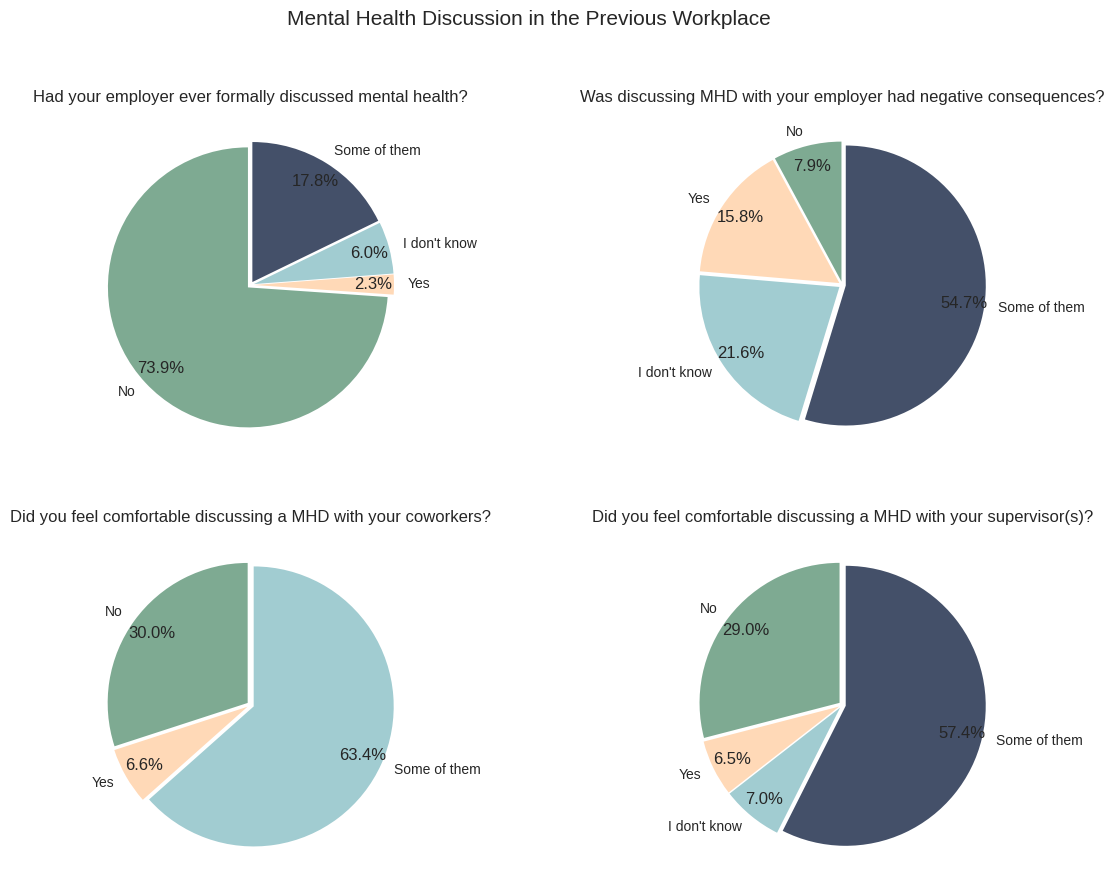

In [41]:
# First Pie: Prev MH Discussion
labels = ['No', 'Yes', "I don't know", "Some of them"]

no_mhd = imputed_df[imputed_df['Prev MH Discussion'] == "None did"].shape[0]
yes_mhd = imputed_df[imputed_df['Prev MH Discussion'] == "Yes, they all did"].shape[0]
dont_know = imputed_df[imputed_df['Prev MH Discussion'] == "I don't know"].shape[0]
some = imputed_df[imputed_df['Prev MH Discussion'] == "Some did"].shape[0]

sizes = [no_mhd, yes_mhd, dont_know, some]
colors = ["#7EAA92", "#FFD9B7", "#A1CCD1", '#445069']
explode = (0.025, 0.025, 0.025, 0.025)

plt.figure(figsize=(14, 10))
plt.suptitle('Mental Health Discussion in the Previous Workplace', fontsize=15)
plt.subplot(2, 2, 1)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title("Had your employer ever formally discussed mental health?")

# Second Pie: Prev MH Discuission Neg Impact

no_mhd_2 = imputed_df[imputed_df['Prev MH Discuission Neg Impact'] == "None of them"].shape[0]
yes_mhd_2 = imputed_df[imputed_df['Prev MH Discuission Neg Impact'] == "Yes, all of them"].shape[0]
dont_know = imputed_df[imputed_df['Prev MH Discuission Neg Impact'] == "I don't know"].shape[0]
some = imputed_df[imputed_df['Prev MH Discuission Neg Impact'] == "Some of them"].shape[0]

sizes_2 = [no_mhd_2, yes_mhd_2, dont_know, some]

plt.subplot(2, 2, 2)
plt.pie(sizes_2, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

plt.title("Was discussing MHD with your employer had negative consequences?")

# Third Pie: Prev MH Discuission Coworkers

labels_3 = ['No', 'Yes', "Some of them"]

no_mhd_3 = imputed_df[imputed_df['Prev MH Discuission Coworkers'] == "No, at none of my previous employers"].shape[0]
yes_mhd_3 = imputed_df[imputed_df['Prev MH Discuission Coworkers'] == "Yes, at all of my previous employers"].shape[0]
some = imputed_df[imputed_df['Prev MH Discuission Coworkers'] == "Some of my previous employers"].shape[0]

sizes_3 = [no_mhd_3, yes_mhd_3, some]
explode_3 = (0.025, 0.025, 0.025)

plt.subplot(2, 2, 3)
plt.pie(sizes_3, colors=colors[:3], labels=labels_3, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode_3)

plt.title("Did you feel comfortable discussing a MHD with your coworkers?")

# Fourth Pie: Prev MH Discuission Supervisor(s)

no_mhd_4 = imputed_df[imputed_df['Prev MH Discuission Supervisor(s)'] == "No, at none of my previous employers"].shape[0]
yes_mhd_4 = imputed_df[imputed_df['Prev MH Discuission Supervisor(s)'] == "Yes, at all of my previous employers"].shape[0]
dont_know = imputed_df[imputed_df['Prev MH Discuission Supervisor(s)'] == "I don't know"].shape[0]
some = imputed_df[imputed_df['Prev MH Discuission Supervisor(s)'] == "Some of my previous employers"].shape[0]

sizes_4 = [no_mhd_4, yes_mhd_4, dont_know, some]

plt.subplot(2, 2, 4)
plt.pie(sizes_4, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

plt.title("Did you feel comfortable discussing a MHD with your supervisor(s)?")

# plt.savefig('past.png')

plt.show()

Almost 20% of employees formally discuss mental health issues with their previous employers or some of their employers, while almost two-thirds of them never did so.

Discussing mental health issues brought negative consequences to approximately 70% of participants in the past, while only 7.9% did not.

Approximately 70 % of employees felt comfortable discussing mental health issues with some of their previous or all of their coworkers and 63.9% of the employees with their previous supervisors, while 30% and 29% of them, respectively did not

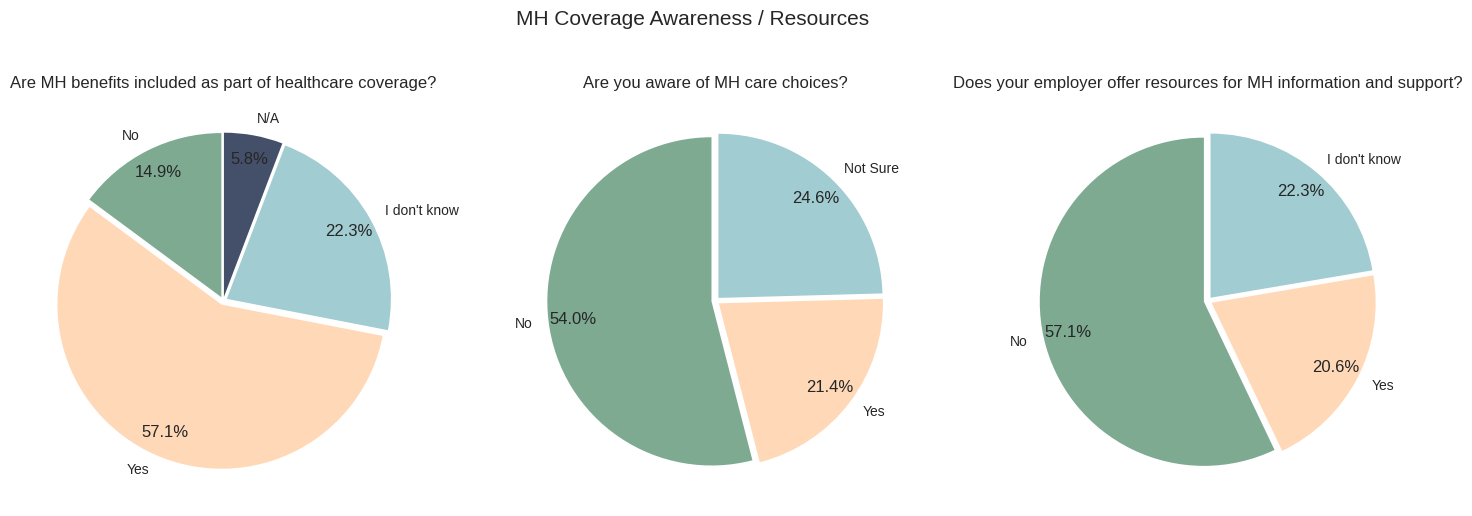

In [42]:
# First Pie: Prev MH Discussion
labels = ['No', 'Yes', "I don't know", "N/A"]

no_mhd = imputed_df[imputed_df['MH Coverage'] == "No"].shape[0]
yes_mhd = imputed_df[imputed_df['MH Coverage'] == "Yes"].shape[0]
dont_know = imputed_df[imputed_df['MH Coverage'] == "I don't know"].shape[0]
n_a = imputed_df[imputed_df['MH Coverage'] == "Not eligible for coverage / N/A"].shape[0]

sizes = [no_mhd, yes_mhd, dont_know, n_a]
colors = ["#7EAA92", "#FFD9B7", "#A1CCD1", '#445069']
explode = (0.025, 0.025, 0.025, 0.025)

plt.figure(figsize=(18, 6))
plt.suptitle('MH Coverage Awareness / Resources', fontsize=15)
plt.subplot(1, 3, 1)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title("Are MH benefits included as part of healthcare coverage?")

# Second Pie: MH Coverage Awareness

labels_2 = ['No', 'Yes', 'Not Sure']

no_mhd_2 = imputed_df[imputed_df['MH Coverage Awareness'] == "No"].shape[0]
yes_mhd_2 = imputed_df[imputed_df['MH Coverage Awareness'] == "Yes"].shape[0]
dont_know = imputed_df[imputed_df['MH Coverage Awareness'] == "I am not sure"].shape[0]

sizes_2 = [no_mhd_2, yes_mhd_2, dont_know]
explode_2 = (0.025, 0.025, 0.025)

plt.subplot(1, 3, 2)
plt.pie(sizes_2, colors=colors[:3], labels=labels_2, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode_2)

plt.title("Are you aware of MH care choices?")

# Third Pie: MH Resources Provided

no_mhd_3 = imputed_df[imputed_df['MH Resources Provided'] == "No"].shape[0]
yes_mhd_3 = imputed_df[imputed_df['MH Resources Provided'] == "Yes"].shape[0]
dont_know = imputed_df[imputed_df['MH Resources Provided'] == "I don't know"].shape[0]

sizes_3 = [no_mhd_3, yes_mhd_3, dont_know]

plt.subplot(1, 3, 3)
plt.pie(sizes_3, colors=colors[:3], labels=labels[:3], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode_2)

plt.title("Does your employer offer resources for MH information and support?")

plt.savefig('awareness.png')

plt.show()


According to the survey’s results, more than half of the responders have Mental Health benefits covered by their healthcare plan, while around 15% do not.

54% of participants are not aware of Mental Health Care choices, and 57.1% of their employers do not offer any information or support.

## **Step 2: Dimensionality Reduction and Clustering**

**Multiple Correspondence Analysis (MCA)**

In [43]:
mca = MCA(n_components=85, n_iter=50, copy=True, check_input=True, random_state=42, one_hot=True)
mca_components = mca.fit(labeled_df)

In [44]:
mca_components.eigenvalues_summary # ≈85%

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.140,4.83%,4.83%
1,0.112,3.88%,8.71%
2,0.106,3.68%,12.40%
3,0.072,2.48%,14.88%
4,0.067,2.33%,17.20%
...,...,...,...
80,0.015,0.51%,82.92%
81,0.014,0.50%,83.42%
82,0.014,0.50%,83.92%


In [45]:
mca_coordinates = mca.transform(labeled_df)
mca_coordinates

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.515981,0.065301,0.129069,-0.158839,0.191200,-0.149335,-0.031004,0.002218,0.295802,-0.267120,...,0.059605,-0.165563,-0.224917,0.131546,0.110053,-0.034623,-0.007091,0.045538,0.024523,-0.085277
1,0.106521,0.637499,-0.404661,-0.022210,0.071606,-0.052127,0.076908,0.158531,0.142094,-0.024291,...,-0.119918,0.298226,0.055356,-0.075037,-0.178213,-0.010788,0.053201,0.042726,0.070618,0.065563
2,-0.423488,-0.128141,0.119548,0.095123,-0.055625,-0.300076,-0.071210,-0.314010,0.237353,0.180354,...,0.232147,0.003990,-0.082003,0.126619,-0.030273,0.111464,0.096013,-0.023892,-0.053641,0.042000
3,0.048452,0.164109,0.564773,-0.089496,-0.061172,-0.021521,-0.017319,0.112892,-0.169369,0.100763,...,0.060405,-0.133372,-0.026578,-0.019063,0.092094,0.033921,0.019329,0.191358,-0.006044,0.105421
4,0.552072,-0.111201,-0.216635,-0.072405,-0.135714,-0.077318,0.029926,-0.132807,-0.120245,-0.104286,...,-0.086740,-0.027823,-0.069642,-0.323384,0.031534,-0.039366,0.174613,-0.266571,0.030872,-0.155300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,-0.172387,0.199267,0.321950,0.304665,-0.529309,0.121257,-0.058401,-0.085388,-0.019240,-0.140407,...,0.154188,0.098282,0.080415,0.262060,-0.103708,-0.030379,0.017261,-0.080245,0.059732,-0.042980
1429,0.008645,-0.019322,0.549102,-0.256357,0.093653,0.402067,0.137102,0.312710,-0.380409,0.073876,...,-0.273914,0.049231,0.128577,0.187150,-0.156380,0.151655,-0.083160,0.139392,0.126357,-0.191521
1430,0.550195,0.230502,-0.166670,-0.113453,-0.216606,0.273914,-0.044572,-0.097912,0.339580,0.004097,...,-0.142582,0.231924,0.045956,0.185145,-0.076542,0.350998,-0.099396,0.086622,-0.189761,0.080424
1431,0.266568,-0.071807,-0.100834,-0.083626,0.248956,-0.190314,-0.301261,-0.019103,0.092531,-0.151344,...,0.152793,0.107922,-0.021753,-0.020925,-0.026200,-0.049972,-0.066443,-0.005519,0.117821,0.238566


In [46]:
features_names = mca_components.column_contributions_.mean(axis=1).sort_values(ascending=False).keys()
features_values = list(mca_components.column_contributions_.mean(axis=1).sort_values(ascending=False))

Text(0.5, 1.0, 'MCA as Feature Selection')

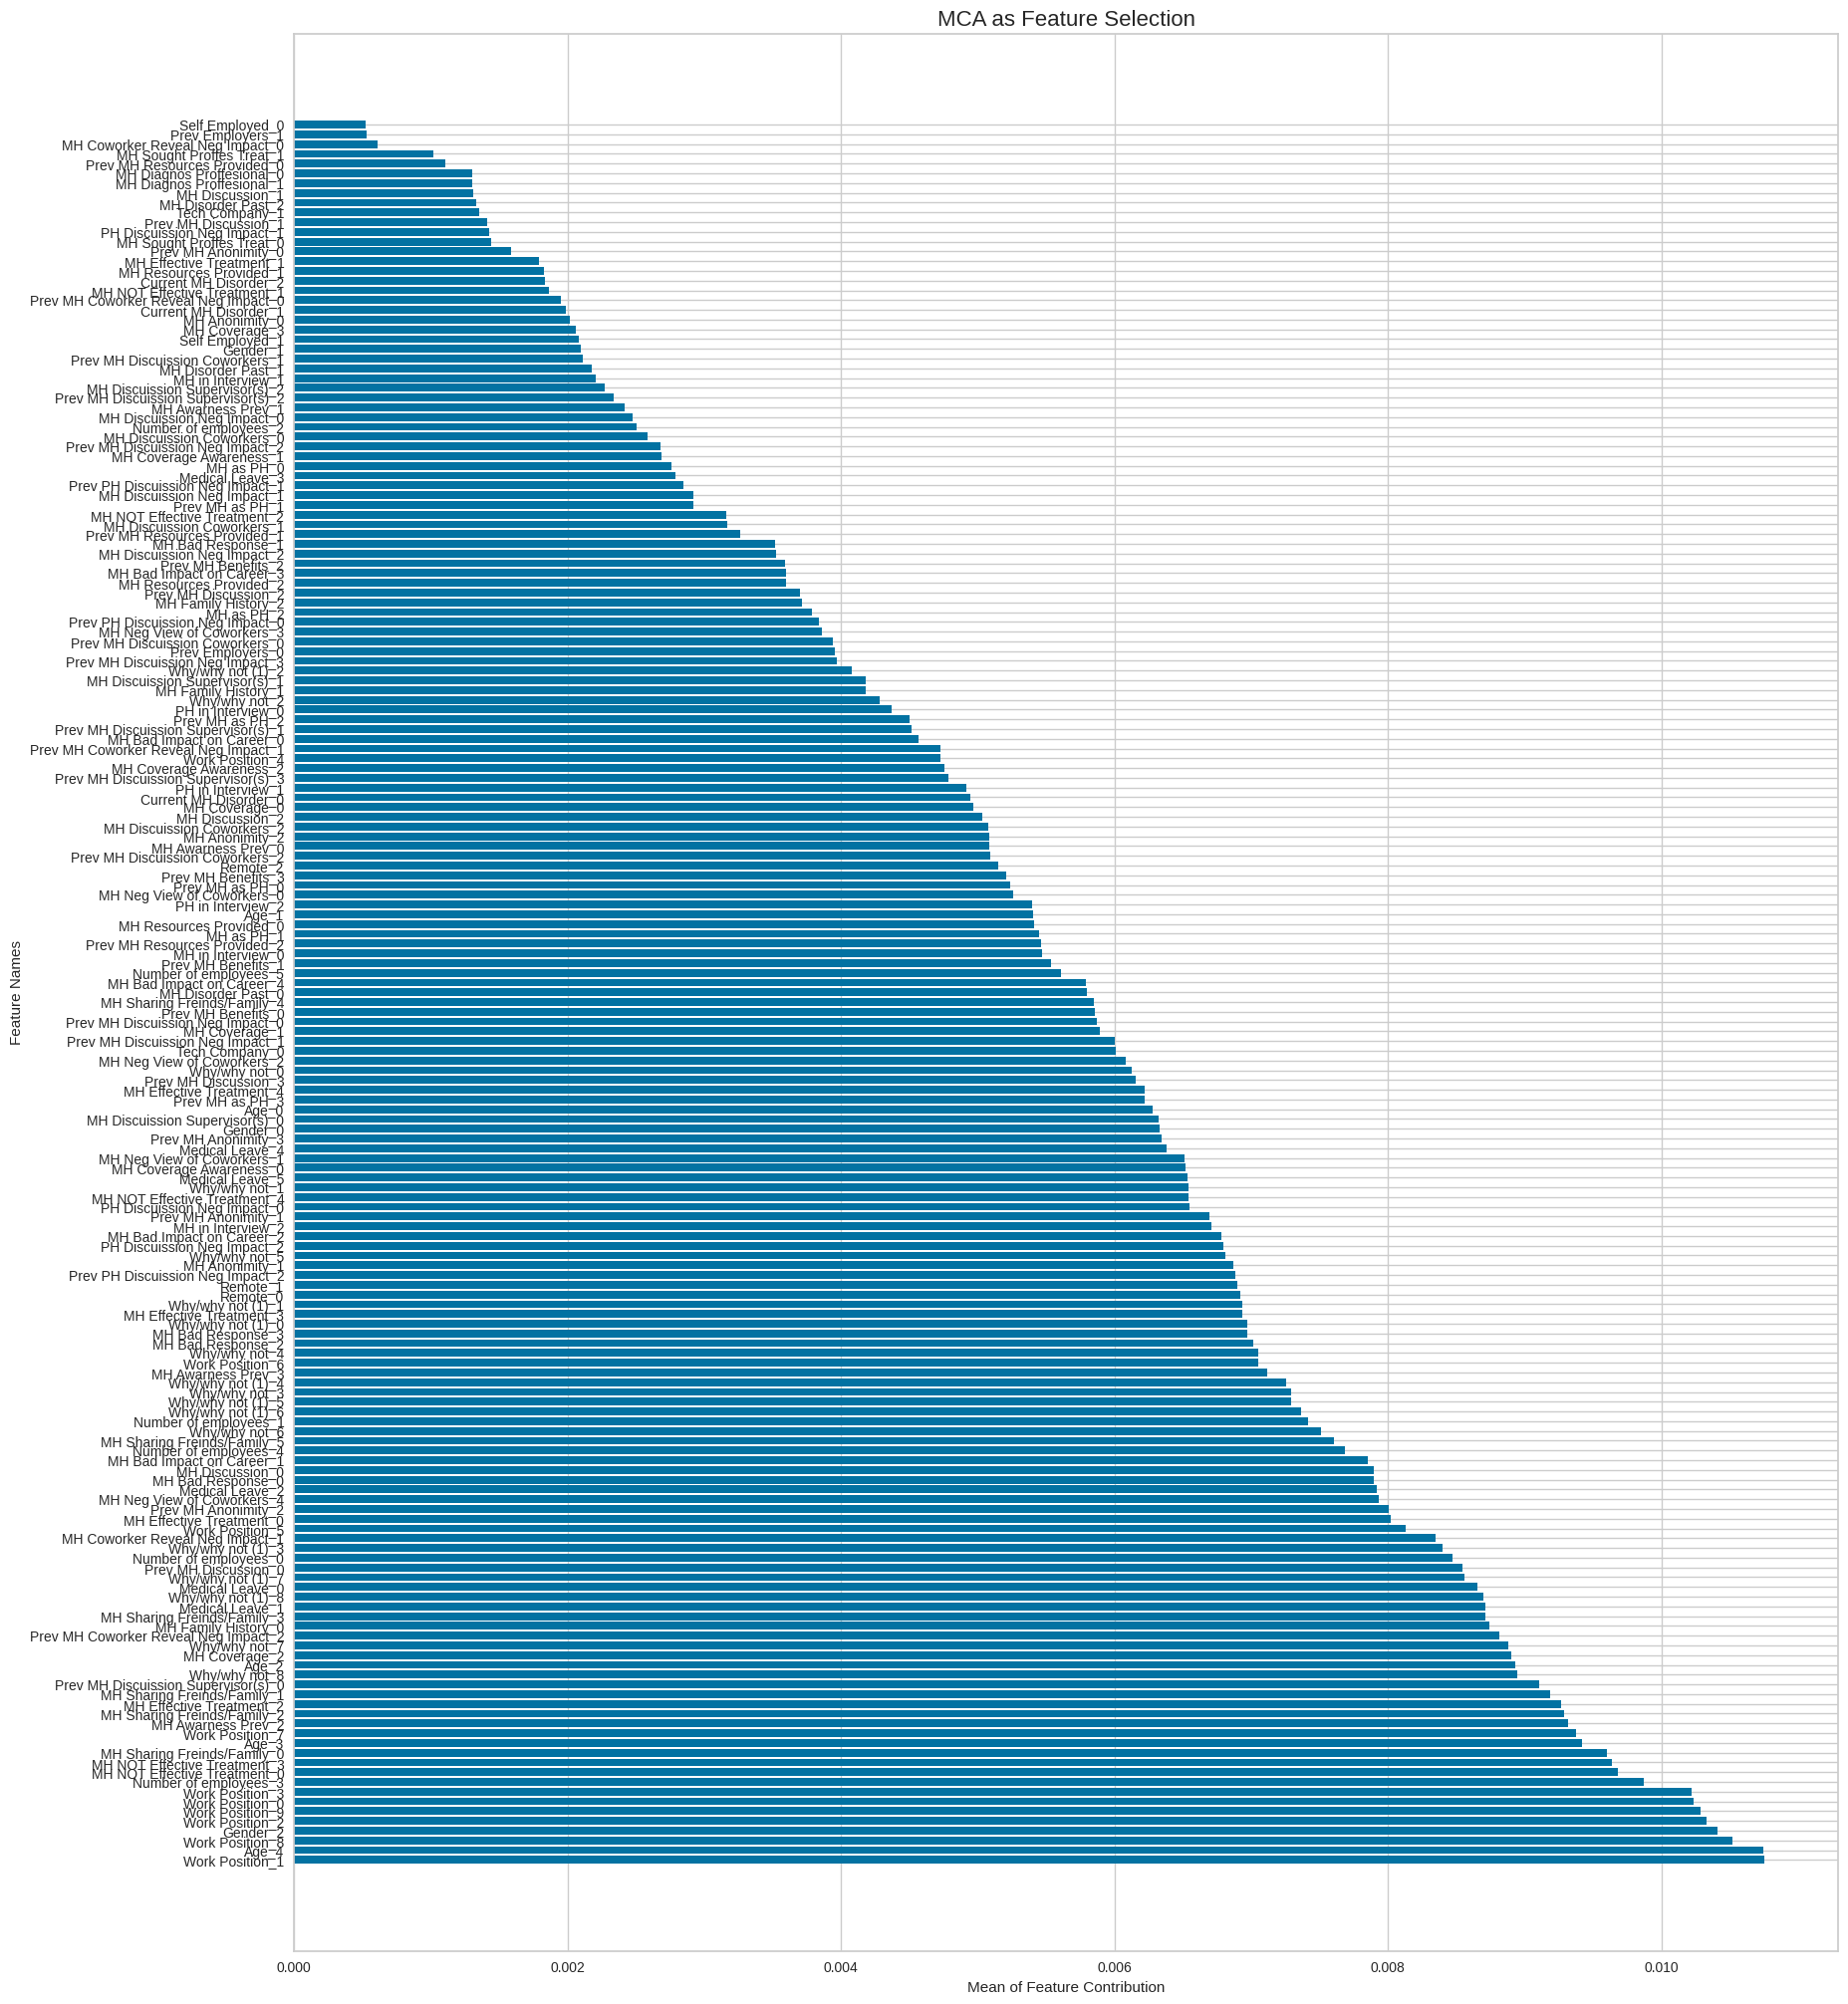

In [47]:
plt.figure(figsize=(20, 25))

y = features_names
x = features_values

plt.barh(y, x)

plt.ylabel("Feature Names")
plt.xlabel("Mean of Feature Contribution")
plt.title("MCA as Feature Selection", size=16)

## **Choosing k value for K-means**

**Elbow method**

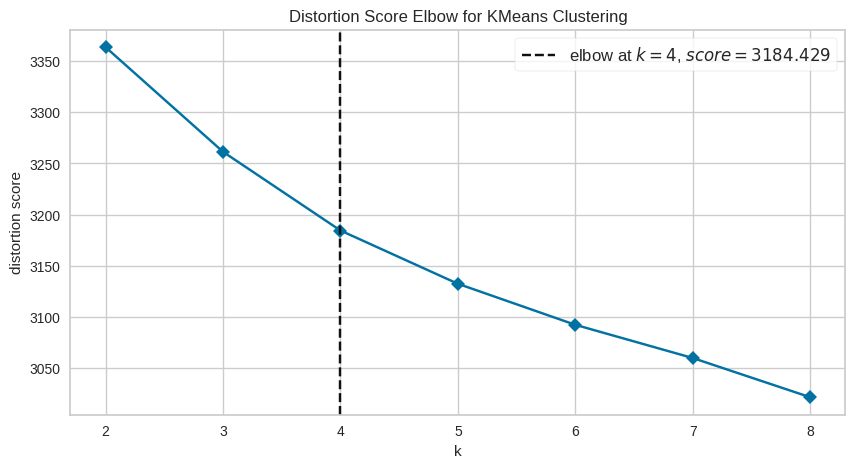

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# create a k-Means model an Elbow-Visualizer
model = KMeans(init="k-means++", max_iter=200)

visualizer = KElbowVisualizer(model, timings=False, k=8)
# fit the visualizer and show the plot
plt.figure(figsize=(10, 5))
visualizer.fit(mca_coordinates)
visualizer.show()

## **Kmeans**

In [49]:
# clustering
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto',init='k-means++', max_iter=200)
clustering = kmeans.fit_predict(mca_coordinates)


# extract centroids of clusters into a dataframe
centers = kmeans.cluster_centers_

# extract cluster labels
labels = kmeans.labels_

**Characteristics of Clusters**

In [50]:
cluster_characteristics = []
sizes = []

for i in range(n_clusters):
    cluster_data = mca_coordinates[labels == i]
    cluster_size = len(cluster_data)
    cluster_center = centers[i]
    avg_distance = np.mean(np.linalg.norm(cluster_data - cluster_center, axis=1))
    cluster_characteristics.append({
        "Cluster": i + 1,
        "Size": cluster_size,
        "Avg Distance": avg_distance,
    })
    sizes.append(cluster_size)

cluster_characteristics

[{'Cluster': 1, 'Size': 430, 'Avg Distance': 1.4284217851173848},
 {'Cluster': 2, 'Size': 268, 'Avg Distance': 1.292597664894094},
 {'Cluster': 3, 'Size': 399, 'Avg Distance': 1.5106437670028736},
 {'Cluster': 4, 'Size': 336, 'Avg Distance': 1.563539667616819}]

**Evaluation of Clusters**

In [51]:
# Inertia
inertia_score = kmeans.inertia_
print("Inertia:", inertia_score)

# Silhouette Score
silhouette_avg = silhouette_score(mca_coordinates, labels)
print("Silhouette Avg:", round(silhouette_avg, 4))

# Calinski Harabasz Score
cal_score = calinski_harabasz_score(mca_coordinates, labels)
print("Calinski Harabasz Score:", round(cal_score, 1))

# Davies Bouldin Score
d_score = davies_bouldin_score(mca_coordinates, labels)
print("Davies Bouldin Score:", round(d_score, 2))

Inertia: 3185.204923847759
Silhouette Avg: 0.0342
Calinski Harabasz Score: 49.6
Davies Bouldin Score: 4.09


Visualizing clusters

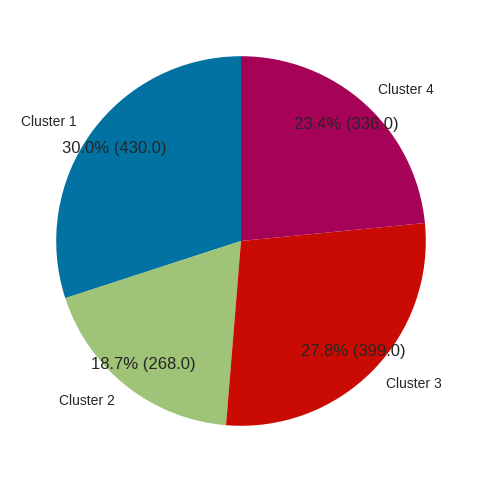

In [52]:
cl_labels = [f'Cluster {i + 1}' for i in range(n_clusters)]

def func(val):
    a = np.round(val/100.*sum(sizes))
    return f'{round(val, 1)}% ({a})'

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=cl_labels, autopct=func, startangle=90, pctdistance=0.85)
plt.savefig("clusters.png")
plt.show()

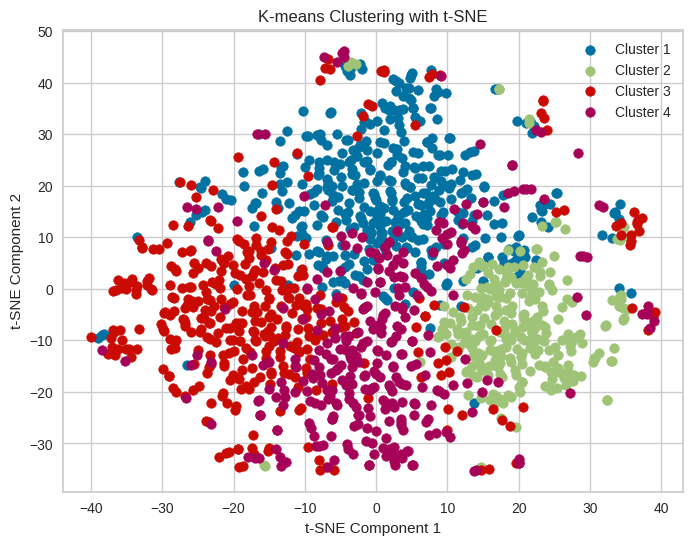

In [53]:
# Visualization of kmeans with TSNE

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(mca_coordinates)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(projections[labels == i][:, 0], projections[labels == i][:, 1], label=f'Cluster {i + 1}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-means Clustering with t-SNE')
plt.legend()
plt.savefig("tsne.png")
plt.show()

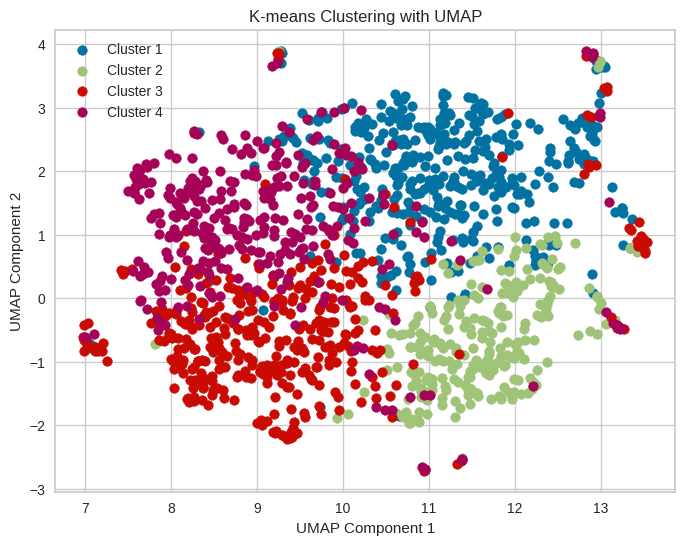

In [54]:
# Visualization of kmeans with UMAP

umap = UMAP(n_components=2, random_state=0, init='random')
umap_projections = umap.fit_transform(mca_coordinates)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(umap_projections[labels == i][:, 0], umap_projections[labels == i][:, 1], label=f'Cluster {i + 1}')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-means Clustering with UMAP')
plt.savefig("umap.png")
plt.legend()

## **Cluster Profiling**

In [55]:
imputed_df['Clusters'] = labels

In [56]:
def cluster_profile(data):
    profile = {}

    for column_name in data.columns:
        if column_name != 'Clusters':
            profile[f'{column_name}'] = data[column_name].value_counts().keys()[0]

    return profile

In [57]:
profiles = imputed_df.groupby('Clusters').apply(cluster_profile)
profiles_df = pd.DataFrame(profiles.tolist(), index=profiles.index)

In [58]:
profiles_df.iloc[:, :15]

,Self Employed,Number of employees,Tech Company,MH Coverage,MH Coverage Awareness,MH Discussion,MH Resources Provided,MH Anonimity,Medical Leave,MH Discuission Neg Impact,PH Discuission Neg Impact,MH Discuission Coworkers,MH Discuission Supervisor(s),MH as PH,MH Coworker Reveal Neg Impact
Clusters,,,,,,,,,,,,,,,
0,0,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,No,No,Maybe,Yes,I don't know,No
1,1,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No
2,0,26-100,1.0,Yes,Yes,No,Yes,I don't know,Somewhat easy,No,No,Maybe,Yes,Yes,No
3,0,More than 1000,1.0,Yes,No,No,No,I don't know,Very difficult,Yes,Maybe,No,No,No,No


In [59]:
profiles_df.iloc[:, 15:30]

,Prev Employers,Prev MH Benefits,MH Awarness Prev,Prev MH Discussion,Prev MH Resources Provided,Prev MH Anonimity,Prev MH Discuission Neg Impact,Prev PH Discuission Neg Impact,Prev MH Discuission Coworkers,Prev MH Discuission Supervisor(s),Prev MH as PH,Prev MH Coworker Reveal Neg Impact,PH in Interview,Why/why not,MH in Interview
Clusters,,,,,,,,,,,,,,,
0,1,I don't know,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,None did,None of them,Maybe,Fear of Discrimination or Prejudice,No
1,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,None did,None of them,Maybe,Fear of Discrimination or Prejudice,No
2,1,Some did,I was aware of some,None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,Some did,None of them,Maybe,Fear of Discrimination or Prejudice,No
3,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,None of them,No,Fear of Discrimination or Prejudice,No


In [60]:
profiles_df.iloc[:, 30:45]

,Why/why not (1),MH Bad Impact on Career,MH Neg View of Coworkers,MH Sharing Freinds/Family,MH Bad Response,MH Family History,MH Disorder Past,Current MH Disorder,MH Diagnos Proffesional,MH Sought Proffes Treat,MH Effective Treatment,MH NOT Effective Treatment,Age,Gender,Country
Clusters,,,,,,,,,,,,,,,
0,Fear of Discrimination or Prejudice,Maybe,Maybe,Somewhat open,No,No,No,No,No,0,Not applicable to me,Not applicable to me,30+,Male,USA
1,Fear of Discrimination or Prejudice,I think yes,Maybe,Somewhat open,No,Yes,Yes,Yes,Yes,1,Sometimes,Often,30+,Male,USA
2,Fear of Discrimination or Prejudice,Maybe,Maybe,Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Often,30+,Male,USA
3,Fear of Discrimination or Prejudice,I think yes,"Yes, I think they would",Somewhat open,Maybe/Not sure,Yes,Yes,Yes,Yes,1,Sometimes,Often,30+,Male,USA


## **Visualizing cluster profiles**

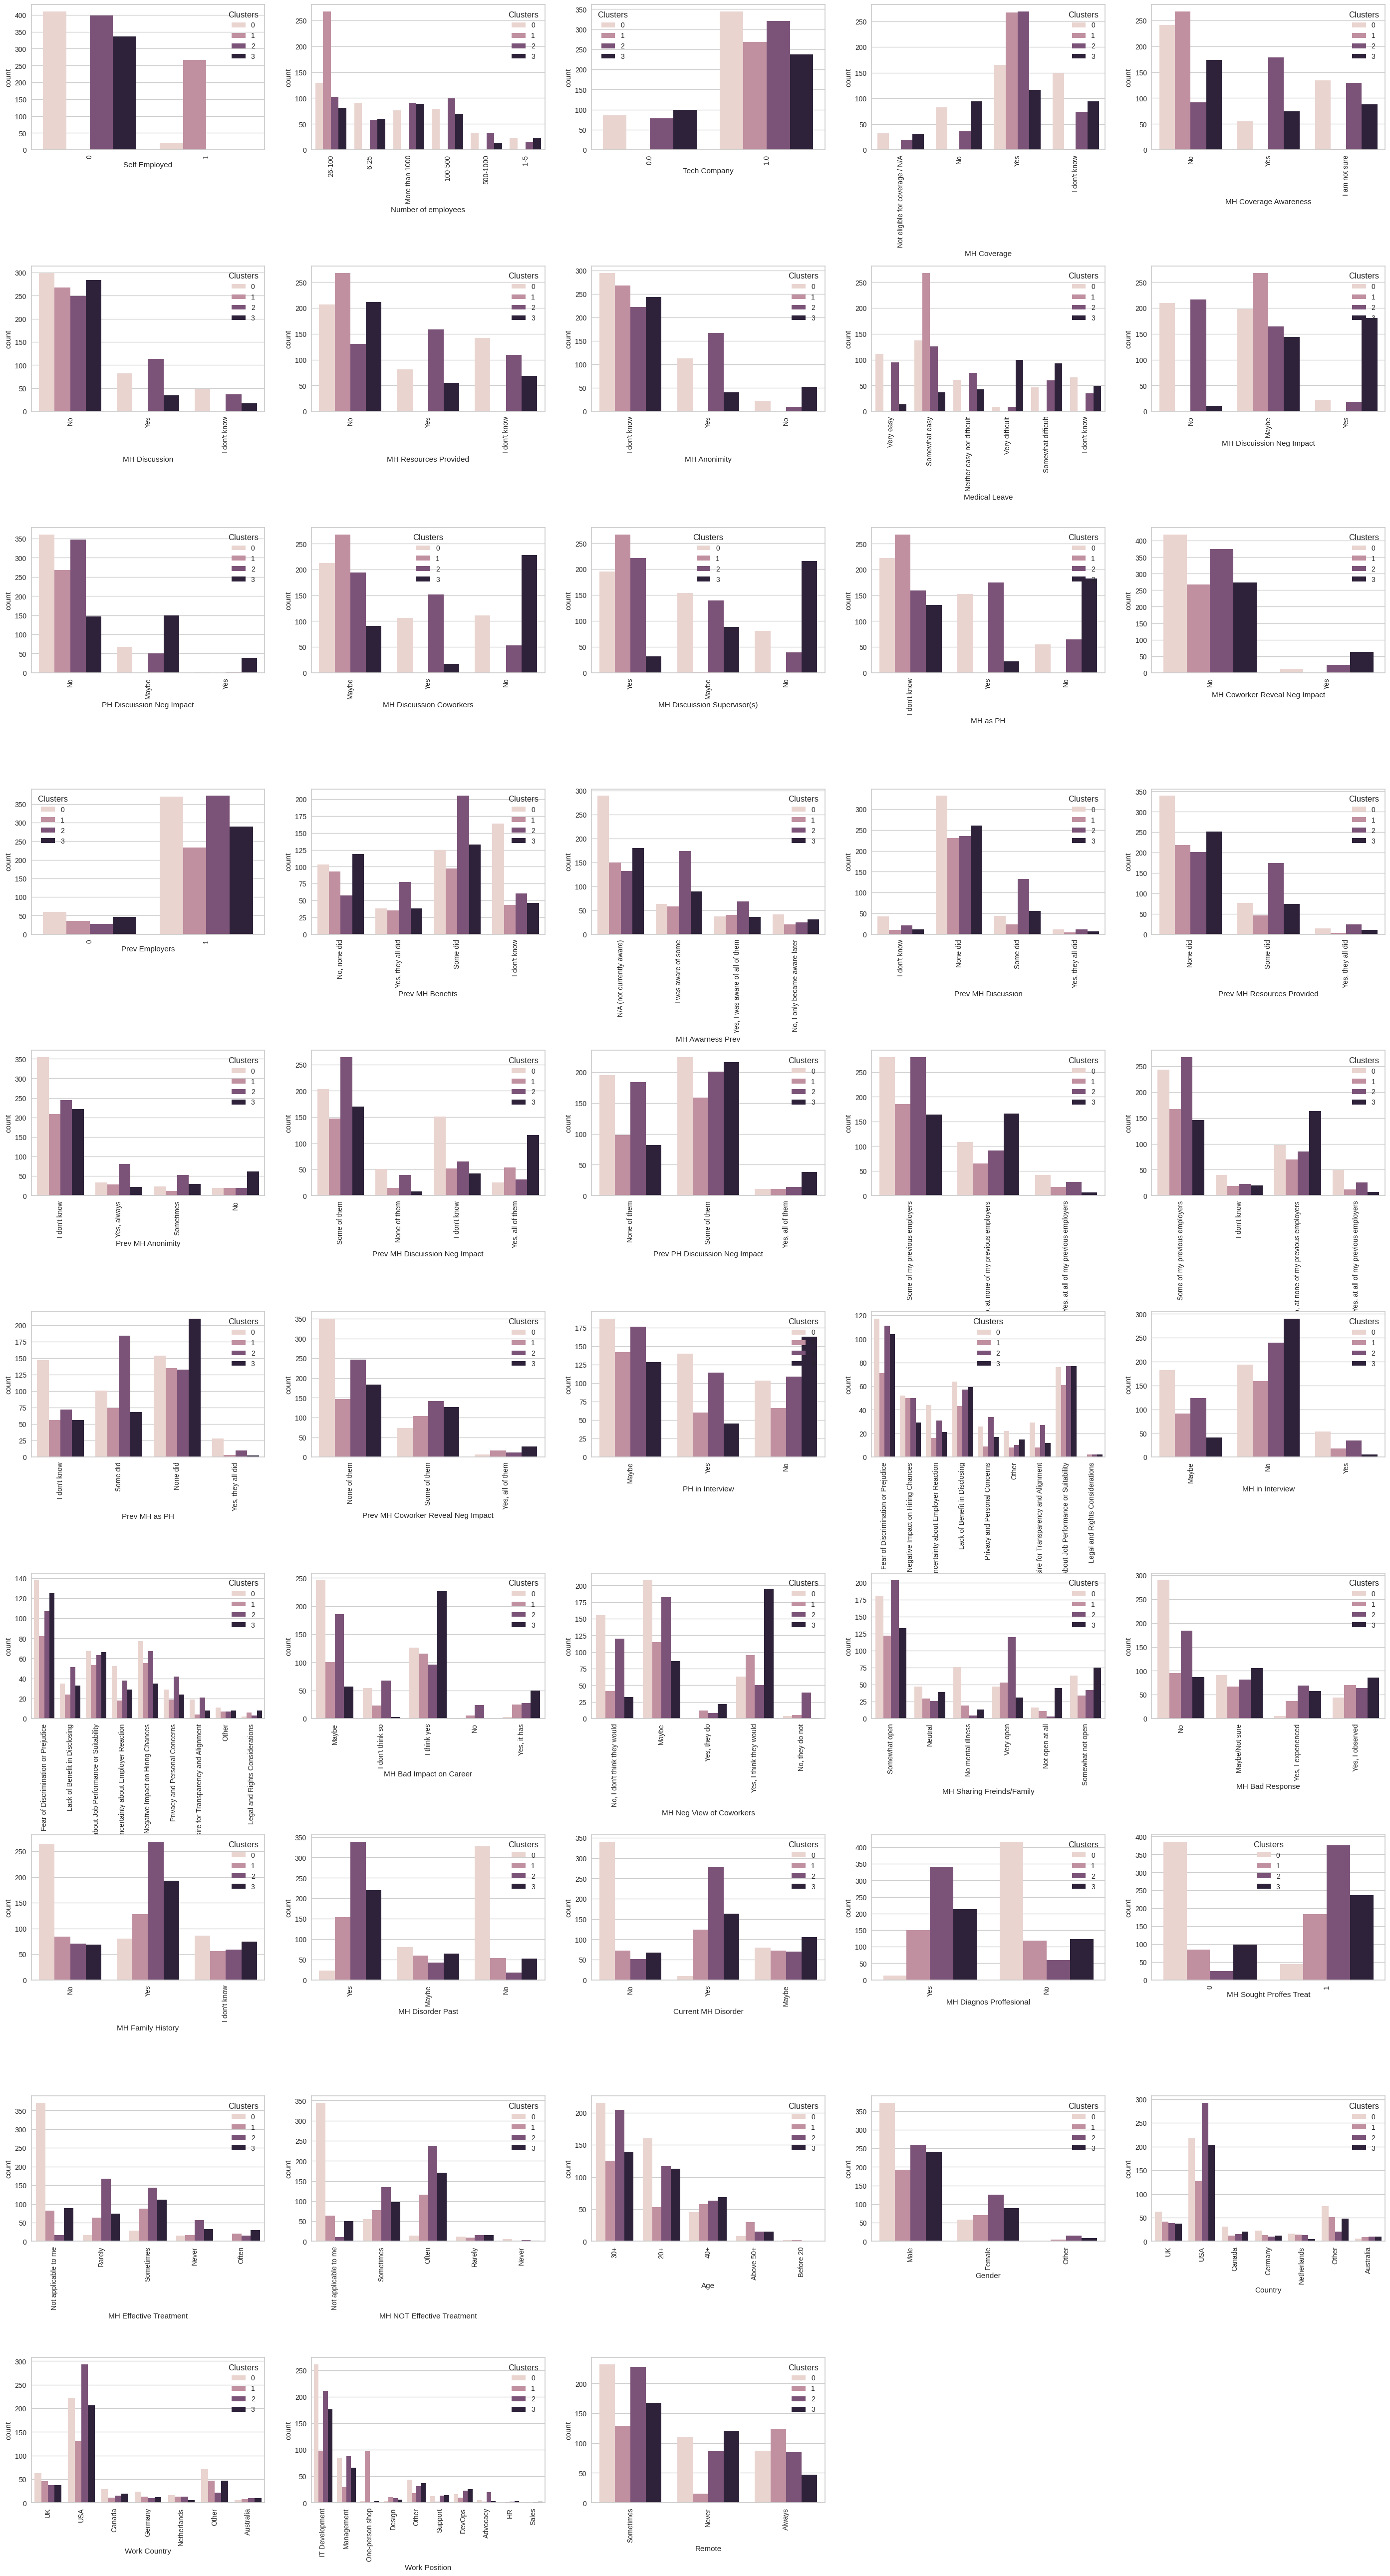

In [61]:
plt.figure(figsize=(35, 65))
for i, column in enumerate(imputed_df.columns):
    if column != 'Clusters':
        plt.subplot(10, 5, i+1)
        sns.countplot(data=imputed_df, x=column, hue='Clusters')
        plt.xticks(rotation=90)
        plt.subplots_adjust(wspace=0.2, hspace=0.8)

plt.savefig('cluster-bar-chart.png')